In [16]:
import matplotlib.pyplot as plt


def print_graph(predicted, x_train, y_train_1, y_train_2):
    plt.clf()
    plt.plot(x_train, y_train_1, 'go', label='Dataset 1 Labels', alpha=0.5)
    plt.plot(x_train, y_train_2, 'go', color='red', label='Dataset 2 Labels', alpha=0.5)

    plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
    plt.legend(loc='best')
    plt.show()

In [17]:
import numpy as np
import torch
from helper_libs.shared.models.LinearRegression import LinearRegression

# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
x_train = torch.from_numpy(x_train)

y_values_1 = [2*i + 1 for i in x_values]
y_train_1 = np.array(y_values_1, dtype=np.float32)
y_train_1 = y_train_1.reshape(-1, 1)
y_train_1 = torch.from_numpy(y_train_1)

y_values_2 = [0.5*i + 0.5 for i in x_values]
y_train_2 = np.array(y_values_2, dtype=np.float32)
y_train_2 = y_train_2.reshape(-1, 1)
y_train_2 = torch.from_numpy(y_train_2)

data_federation = [[x_train, y_train_1], [x_train, y_train_2]]

in_layer = 1
out_layer = 1
optimizer = "SGD"
criterion = "MSELoss"
starting_model = LinearRegression(in_layer, out_layer)
federal_epochs = 1
epochs = 50
learn_rate = 0.01

In [18]:
from sail_safe_functions_orchestrator.machine_learning.federated_averaging import federated_averaging

model = federated_averaging(epochs, federal_epochs, data_federation, learn_rate, starting_model, criterion, optimizer)

### Model Before and After

/tmp/ipykernel_7424/190915468.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_train, y_train_2, 'go', color='red', label='Dataset 2 Labels', alpha=0.5)


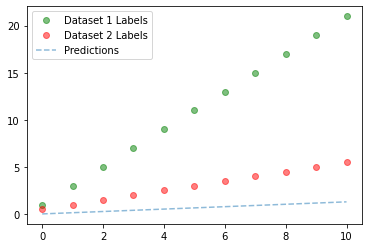

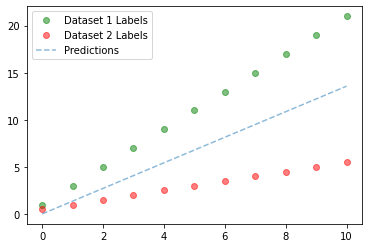

In [19]:
print_graph(starting_model(data_federation[0][0]).data.numpy(), x_train, y_train_1, y_train_2)
print_graph(model(data_federation[0][0]).data.numpy(), x_train, y_train_1, y_train_2)